In [ ]:
import pandas as pd

df = pd.read_csv('/content/news.csv')
display(df.head())

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
print(f"Input text column: 'text'")
print(f"Target label column: 'label'")

# Print dataset size (number of rows and columns)
print(f"Dataset size: {df.shape[0]} rows, {df.shape[1]} columns")

# Print class distribution of the target label
print("\nClass distribution of 'label' column:")
display(df['label'].value_counts())

Input text column: 'text'
Target label column: 'label'
Dataset size: 6335 rows, 4 columns

Class distribution of 'label' column:


,count
label,
REAL,3171
FAKE,3164


In [ ]:
# Download NLTK stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Initialize Porter Stemmer
ps = PorterStemmer()

# Define a preprocessing function
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and numbers, keep only letters and spaces
    words = text.split() # Split into words
    words = [word for word in words if word not in stopwords.words('english')] # Remove stopwords
    # Optional: Stemming
    # words = [ps.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Display the first 5 samples of the preprocessed text
print("First 5 samples of preprocessed text:")
display(df['text'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


First 5 samples of preprocessed text:


,text
0,daniel greenfield shillman journalism fellow f...
1,google pinterest digg linkedin reddit stumbleu...
2,us secretary state john f kerry said monday st...
3,kaydee king kaydeeking november lesson tonight...
4,primary day new york frontrunners hillary clin...


In [ ]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting to 5000 features for demonstration

# Fit and transform the preprocessed text data
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Print feature matrix shape
print(f"Feature matrix shape: {X_tfidf.shape}")

# Display sample feature names
print("\nSample feature names (first 20):")
display(tfidf_vectorizer.get_feature_names_out()[:20])

Feature matrix shape: (6335, 5000)

Sample feature names (first 20):


array(['abandon', 'abandoned', 'abc', 'abdullah', 'abedin', 'ability',
       'able', 'abortion', 'abortions', 'abroad', 'absence', 'absolute',
       'absolutely', 'absurd', 'abuse', 'abuses', 'academic', 'academy',
       'accept', 'acceptable'], dtype=object)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Print the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (5068, 5000)
Shape of X_test: (1267, 5000)
Shape of y_train: (5068,)
Shape of y_test: (1267,)


### The Assumption of Conditional Independence in Naive Bayes

The Naive Bayes algorithm is a probabilistic classifier based on Bayes' theorem, with a crucial 'naive' assumption: **conditional independence of features**.

Here's what that means:

1.  **Bayes' Theorem**: At its core, Naive Bayes uses Bayes' theorem to calculate the probability of a class (e.g., 'FAKE' or 'REAL') given a set of observed features (e.g., the words in a news article):

    $$P(Class|Features) = \frac{P(Features|Class) \cdot P(Class)}{P(Features)}$$

    *   $P(Class|Features)$ is the posterior probability: the probability of the class given the features.
    *   $P(Features|Class)$ is the likelihood: the probability of observing the features given the class.
    *   $P(Class)$ is the prior probability: the probability of the class before seeing any features.
    *   $P(Features)$ is the evidence: the probability of observing the features.

2.  **The 'Naive' Assumption**: To make the calculation of $P(Features|Class)$ tractable, especially when dealing with many features (like thousands of words in a text classification problem), Naive Bayes assumes that **each feature is conditionally independent of every other feature, given the class**.

    In simpler terms, this means that the presence or absence of a particular word in a document (e.g., 'politics') does not affect the presence or absence of another word (e.g., 'economy'), *given that we already know the document's class* (e.g., it's a 'REAL' news article).

    Mathematically, for features $F_1, F_2, \dots, F_n$ and a class $C$:

    $$P(F_1, F_2, \dots, F_n | C) = P(F_1|C) \cdot P(F_2|C) \cdot \dots \cdot P(F_n|C)$$

3.  **Why 'Naive'?**: This assumption is called 'naive' because it's often not true in real-world scenarios. For instance, in a news article, the presence of the word 'president' is highly likely to be correlated with the presence of 'government'. These words are not truly independent.

4.  **Despite the Assumption**: Despite this unrealistic assumption, Naive Bayes classifiers often perform surprisingly well in practice, especially in text classification. This is because:

    *   **Simplicity and Efficiency**: It's computationally inexpensive and fast to train.
    *   **Robustness to Irrelevant Features**: Irrelevant features (words) don't significantly harm the prediction, as they are averaged out.
    *   **Good for High-Dimensional Data**: It handles high-dimensional data (many features) well, which is common in text data where each unique word can be a feature.

For text classification tasks, `Multinomial Naive Bayes` is often chosen because it is well-suited for discrete counts (like word counts or TF-IDF values, which are essentially normalized counts) and performs effectively in such scenarios.

In [ ]:
# Initialize and train the Multinomial Naive Bayes model
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

# Display model parameters (if any are directly accessible or useful)
# For MultinomialNB, parameters are typically learned probabilities, not 'hyperparameters' like in other models.
# We can look at the classes and feature log probabilities.
print("Model classes:", mnb_model.classes_)
print("Number of features:", mnb_model.n_features_in_)
print("Number of training samples per class:", mnb_model.class_count_)
print("Log prior probability for each class:", mnb_model.class_log_prior_)
print("Log probability of features given a class (first 5 features for each class):")
display(pd.DataFrame(mnb_model.feature_log_prob_[:, :5], columns=tfidf_vectorizer.get_feature_names_out()[:5], index=mnb_model.classes_))

Model classes: ['FAKE' 'REAL']
Number of features: 5000
Number of training samples per class: [2531. 2537.]
Log prior probability for each class: [-0.69433178 -0.69196398]
Log probability of features given a class (first 5 features for each class):


,abandon,abandoned,abc,abdullah,abedin
FAKE,-9.477648,-9.313346,-9.010888,-9.745106,-7.959056
REAL,-9.290732,-9.320792,-9.015442,-9.311361,-9.474541


In [ ]:
# Import necessary metrics (if not already imported)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd # For displaying confusion matrix nicely

# Make predictions on the test set
y_pred = mnb_model.predict(X_test)

print("--- Model Evaluation ---")

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Classification Report (includes Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

# 3. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
cm_df = pd.DataFrame(cm, index=['Actual FAKE', 'Actual REAL'], columns=['Predicted FAKE', 'Predicted REAL'])
display(cm_df)

# Interpretation of Confusion Matrix
print("\nInterpretation of Confusion Matrix:")
print(f"True Negatives (Top-Left): {cm[0,0]} - FAKE news correctly predicted as FAKE")
print(f"False Positives (Top-Right): {cm[0,1]} - FAKE news incorrectly predicted as REAL")
print(f"False Negatives (Bottom-Left): {cm[1,0]} - REAL news incorrectly predicted as FAKE")
print(f"True Positives (Bottom-Right): {cm[1,1]} - REAL news correctly predicted as REAL")

--- Model Evaluation ---
Accuracy: 0.8635

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.85      0.88      0.87       633
        REAL       0.88      0.84      0.86       634

    accuracy                           0.86      1267
   macro avg       0.86      0.86      0.86      1267
weighted avg       0.86      0.86      0.86      1267


Confusion Matrix:


,Predicted FAKE,Predicted REAL
Actual FAKE,559,74
Actual REAL,99,535



Interpretation of Confusion Matrix:
True Negatives (Top-Left): 559 - FAKE news correctly predicted as FAKE
False Positives (Top-Right): 74 - FAKE news incorrectly predicted as REAL
False Negatives (Bottom-Left): 99 - REAL news incorrectly predicted as FAKE
True Positives (Bottom-Right): 535 - REAL news correctly predicted as REAL


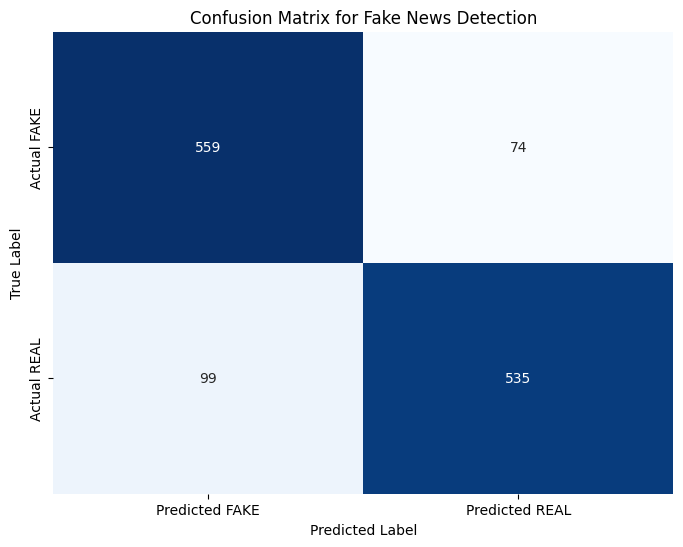

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Fake News Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()